## Exploring and processing data

In [ ]:
#imports
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot

## Import data

In [ ]:
#set the path of the raw data

raw_data_path=os.path.join(os.path.pardir,'data','raw')
train_data_path=os.path.join(raw_data_path,'train.csv')
test_data_path=os.path.join(raw_data_path,'test.csv')

In [ ]:
#read data file with all default calumns
train_df=pd.read_csv(train_data_path,index_col='PassengerId')
test_df=pd.read_csv(test_data_path,index_col='PassengerId')

In [ ]:
#to set display option
#pd.set_option('display.height',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

In [ ]:
print(train_df)

## Manupulation

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
test_df['Survived']=-999 #default value

In [ ]:
df=pd.concat((train_df,test_df),axis=0)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.head(10)

In [ ]:
df.tail()

In [ ]:
#column selection using dot
df.Name.head()

In [ ]:
#using string
df['Name'].head()

In [ ]:
#selecting multiple columns
df[['Name','Age']]

In [ ]:
#using index
#fefore , is row and after  , is column
df.loc[5:10,]

In [ ]:
df.loc[5:10,'Age':'Pclass']

In [ ]:
df.loc[5:10,['Age','Pclass','Survived']]

In [ ]:
#position based indexing
df.iloc[5:8,3:8]

## Filtering

In [ ]:
#filtering
male_passengers=df.loc[df.Sex=='male',:]
print('Number of male Passengers: {0}'.format(len(male_passengers)))

In [ ]:
print(df.loc[:,'Sex'])

In [ ]:
#male passengein in first class
#filtering
male_passengers=df.loc[((df.Sex=='male') & (df.Pclass==1)),:]
print('Number of male Passengers: {0}'.format(len(male_passengers)))

## Summary Statistics

In [ ]:
#describe to get all data statistics
df.describe()

### Numerical feature

In [ ]:
#centrality measures

print('Mean is : {}'.format(df.Fare.mean()))
print('Mean is : {}'.format(df.Fare.median()))

In [ ]:
#dispersion mesasures
print('Minimum is : {}'.format(df.Fare.min()))
print('Maximum is : {}'.format(df.Fare.max()))
print('Range is : {}'.format((df.Fare.max()-df.Fare.min())))
print('25% Quartile is : {}'.format(df.Fare.quantile(.25)))
print('50% Quartile is : {}'.format(df.Fare.quantile(.5)))
print('75% Quartile is : {}'.format(df.Fare.quantile(.75)))
print('Varience is : {}'.format(df.Fare.var()))
print('Standard Deviation is : {}'.format(df.Fare.std()))

In [81]:
%matplotlib inline

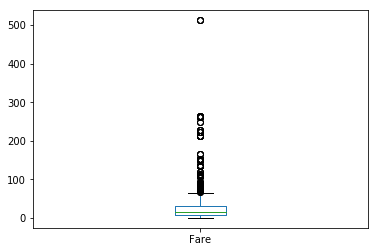

In [84]:
#Box plot
df.Fare.plot('box')

### categorical feature

In [88]:
# to get description of categorical features include all in parameter
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-318.747135,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,466.107167,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-999.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-999.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [91]:
#categorical count
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [93]:
#To get value count of survived and not survived
df[df.Survived!=-999].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

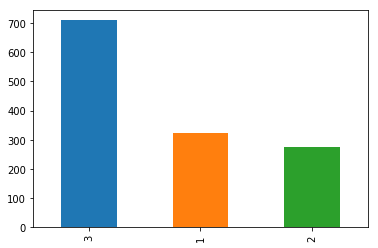

In [101]:
#visualise counts
df.Pclass.value_counts().plot(kind='bar')

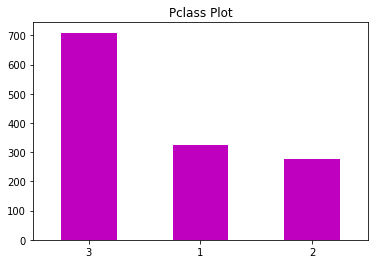

In [106]:
#to include details on plot
df.Pclass.value_counts().plot(kind='bar',title='Pclass Plot',color='m',rot=0)

## Distributions

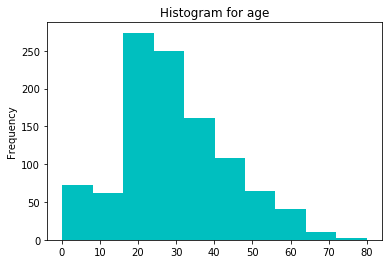

In [108]:
#use hist to create histogram
df.Age.plot(kind='hist',title='Histogram for age',color='c')

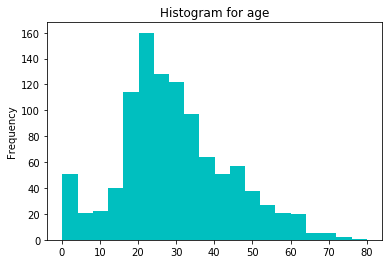

In [109]:
#use hist to create histogram
df.Age.plot(kind='hist',title='Histogram for age',color='c',bins=20)

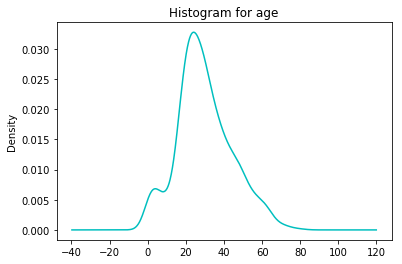

In [110]:
#use kde plot
df.Age.plot(kind='kde',title='Histogram for age',color='c')

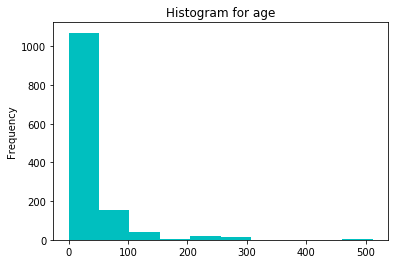

In [111]:
#use hist to create histogram
df.Fare.plot(kind='hist',title='Histogram for age',color='c')

In [115]:
print('skewness of age: {0:2f} '.format(df.Age.skew()))
print('skewness of Fare: {0:2f}'.format(df.Fare.skew()))

skewness of age: 0.407675 
skewness of Fare: 4.367709


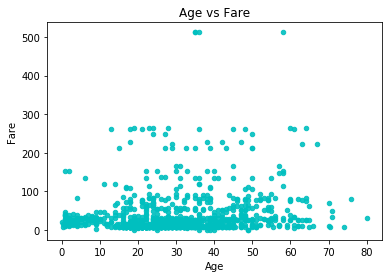

In [121]:
#use hist to create histogram
df.plot.scatter(x='Age',y='Fare',color='c',title='Age vs Fare',alpha=0.9)

## Grouping and Aggregations

In [123]:
#group by
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [125]:
#group by
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [129]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [130]:
df.groupby(['Pclass']).agg({'Fare':'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [133]:
#more complex agreegations
aggregations={
    'Fare':{
        'mean_fare':'mean',
        'median_fare':'median',
        'min_fare':min,
        'max_fare':max    
    },
    'Age':{
        'mean_age':'mean',
        'median_age':'median',
        'min_gae':min,
        'max_age':max
    }
        }

In [134]:
df.groupby(['Pclass']).agg(aggregations)

C:\Users\vkrnt\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                           
        mean_fare median_fare min_fare  max_fare   mean_age median_age min_gae max_age
Pclass                                                                                
1       87.508992     60.0000      0.0  512.3292  39.159930       39.0    0.92    80.0
2       21.179196     15.0458      0.0   73.5000  29.506705       29.0    0.67    70.0
3       13.302889      8.0500      0.0   69.5500  24.816367       24.0    0.17    74.0

## Cross tab

In [136]:
#pivot table
df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [137]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [141]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging: Working with missing values

In [142]:
#ditect missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Feature: Embarked

In [145]:
#extract embarked as null
df.Embarked.isnull().value_counts()
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [153]:
#how many people embarked at different points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [156]:
#which embarked point had maximum number of survivors
df[df.Survived==1].Embarked.value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [157]:
#survived value
df.Survived.value_counts()

 0      549
-999    418
 1      342
Name: Survived, dtype: int64

In [161]:
#explore fare of each class and each embarkment point
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [162]:
#impute value with C
df.Embarked.fillna('C',inplace=True)

In [163]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


## Feature: Fare

In [164]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-999,3701


In [168]:
df.groupby(['Embarked','Pclass']).Fare.median()

Embarked  Pclass
C         1         78.2667
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3          8.0500
Name: Fare, dtype: float64

In [169]:
df.Fare.fillna(8.05,inplace=True)

## Feature: Age

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [172]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [185]:
#function to extract title from name
def GetTitle(name):
    title_group={  'mr' :'Mr'
                 , 'mrs':'Mrs'
                 , 'miss':'Miss'
                 , 'master':'Master'
                 , 'don':'Sir'
                 , 'rev':'Sir'
                 , 'dr':'Officer'
                 , 'mme':'Mrs'
                 , 'ms':'Officer'
                 , 'major':'Officer'
                 , 'lady':'Lady'
                 , 'sir':'Sir'
                 , 'mlle':'Miss'
                 , 'col':'Officer'
                 , 'capt':'Officer'
                 , 'the countess':'Lady'
                 , 'jonkheer':'Sir'
                 , 'dona':'Lady'
                 }
    first_name_with_title=name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title_group[title]

In [186]:
df.Name.map(GetTitle)
#df.Name.map(lambda x : GetTitle(x))

PassengerId
1            Mr
2           Mrs
3          Miss
4           Mrs
5            Mr
6            Mr
7            Mr
8        Master
9           Mrs
10          Mrs
11         Miss
12         Miss
13           Mr
14           Mr
15         Miss
16          Mrs
17       Master
18           Mr
19          Mrs
20          Mrs
21           Mr
22           Mr
23         Miss
24           Mr
25         Miss
26          Mrs
27           Mr
28           Mr
29         Miss
30           Mr
31          Sir
32          Mrs
33         Miss
34           Mr
35           Mr
36           Mr
37           Mr
38           Mr
39         Miss
40         Miss
41          Mrs
42          Mrs
43           Mr
44         Miss
45         Miss
46           Mr
47           Mr
48         Miss
49           Mr
50          Mrs
51       Master
52           Mr
53          Mrs
54          Mrs
55           Mr
56           Mr
57         Miss
58           Mr
59         Miss
60       Master
61           Mr
62         M

In [182]:
df.Name.map(GetTitle).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [187]:
df['Title']=df.Name.map(lambda x:GetTitle(x))

In [188]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


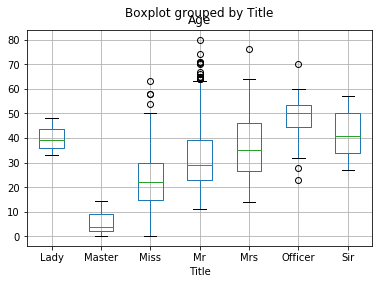

In [189]:
#box plot of age with title
df[df.Age.notnull()].boxplot('Age','Title')

In [192]:
#replace missing values
title_age_median=df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median,inplace=True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


## Working with outliers

### Age

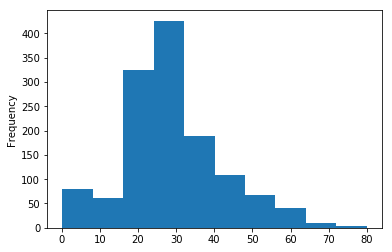

In [194]:
#hist to understand age
df.Age.plot(kind='hist')

In [195]:
df.loc[df.Age>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-999,19877,Mrs


### Fare

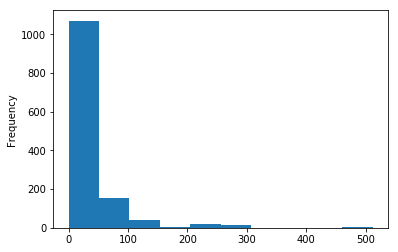

In [196]:
#hist for fare
df.Fare.plot(kind='hist')

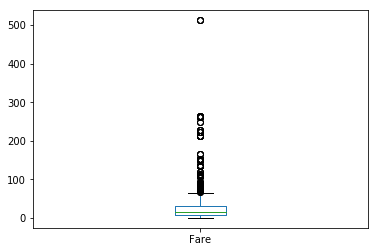

In [197]:
df.Fare.plot(kind='box')

In [203]:
#check outliers
df.loc[df.Fare==df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-999,PC 17755,Mrs


In [204]:
#reduce skewness
LogFare=np.log(df.Fare+1.0)

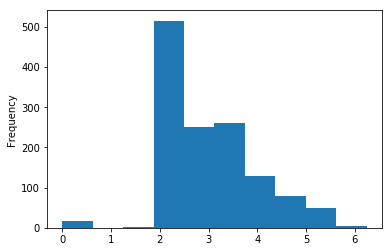

In [205]:
LogFare.plot(kind='hist')

In [207]:
#binning
pd.qcut(df.Fare,4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
8        (14.454, 31.275]
9         (7.896, 14.454]
10       (14.454, 31.275]
11       (14.454, 31.275]
12       (14.454, 31.275]
13        (7.896, 14.454]
14       (14.454, 31.275]
15        (-0.001, 7.896]
16       (14.454, 31.275]
17       (14.454, 31.275]
18        (7.896, 14.454]
19       (14.454, 31.275]
20        (-0.001, 7.896]
21       (14.454, 31.275]
22        (7.896, 14.454]
23        (7.896, 14.454]
24      (31.275, 512.329]
25       (14.454, 31.275]
26      (31.275, 512.329]
27        (-0.001, 7.896]
28      (31.275, 512.329]
29        (-0.001, 7.896]
30        (-0.001, 7.896]
31       (14.454, 31.275]
32      (31.275, 512.329]
33        (-0.001, 7.896]
34        (7.896, 14.454]
35      (31.275, 512.329]
36      (31.275, 512.329]
37        (-0.001, 7.896]
38        (7.896, 14.454]


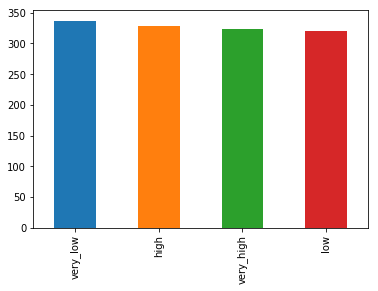

In [211]:
pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar')

In [212]:
#create feature
df['Fare_Bin']=pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

## Featue Engg

### Feature: Age State

In [215]:
#Age state based on age
df['AgeState']=np.where(df.Age>=18,'Adult','Child')

In [216]:
df.AgeState.value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [218]:
#survived child
#np.where(df.Survived==1).
pd.crosstab(df[df.Survived!=-999].Survived,df[df.Survived!=-999].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


### Feature : family Size

In [219]:
#family adding parents with sibb
df['Family_Size']=df.Parch+df.SibSp+1

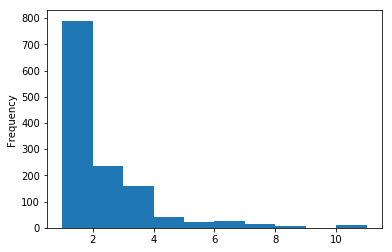

In [221]:
df.Family_Size.plot(kind='hist')

In [225]:
pd.crosstab(df[df.Survived!=-999].Survived,df[df.Survived!=-999].Family_Size)

Family_Size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature: IsMother

In [226]:
#finding mother
df['IsMother']=np.where(((df.Sex=='female') & (df.Parch>0) & (df.Age>=18) & (df.Title!='Miss')),1,0)

In [227]:
pd.crosstab(df[df.Survived!=-999].Survived,df[df.Survived!=-999].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,302,40


### Deck

In [228]:
df.Cabin

PassengerId
1               NaN
2               C85
3               NaN
4              C123
5               NaN
6               NaN
7               E46
8               NaN
9               NaN
10              NaN
11               G6
12             C103
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              D56
23              NaN
24               A6
25              NaN
26              NaN
27              NaN
28      C23 C25 C27
29              NaN
30              NaN
31              NaN
32              B78
33              NaN
34              NaN
35              NaN
36              NaN
37              NaN
38              NaN
39              NaN
40              NaN
41              NaN
42              NaN
43              NaN
44              NaN
45              NaN
46              NaN
47              NaN
48              NaN
49              NaN
50      

In [229]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [231]:
df.loc[df.Cabin=='T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,Family_Size,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [234]:
df.loc[df.Cabin=='T','Cabin']=np.NaN

In [238]:
#extract first caracter of cabin
def GetCabin(Cabin):
    return np.where(pd.notnull(Cabin),str(Cabin)[0],'Z')

df['Deck']=df['Cabin'].map(lambda x:GetCabin(x))

In [239]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [241]:
pd.crosstab(df[df.Survived!=-999].Survived,df[df.Survived!=-999].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


## Categorical feature Engg

In [242]:
df['IsMale']=np.where(df.Sex=='male',1,0)

In [244]:
pd.crosstab(df[df.Survived!=-999].Survived,df[df.Survived!=-999].IsMale)

IsMale,0,1
Survived,,
0,81,468
1,233,109


In [245]:
#One hot encoding
df=pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
Family_Size           1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

## Drop useless columns

In [247]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1,inplace=True)

In [249]:
#reorder Columns
columns=[column for column in df.columns if column!='Survived']
columns=['Survived']+columns
df=df[columns]

In [250]:
df.head()

,Survived,Age,Fare,Family_Size,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,Pclass_1,Pclass_2,Pclass_3,Title_Lady,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
2,1,38.0,71.2833,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
3,1,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
4,1,35.0,53.1000,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
5,0,35.0,8.0500,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0


# Save Processed Data

In [253]:
processed_data_path=os.path.join(os.path.pardir,'data','processed')
write_train_path=os.path.join(processed_data_path,'train.csv')
write_test_data=os.path.join(processed_data_path,'test.csv')

In [255]:
#train data
df.loc[df.Survived!=-999].to_csv(write_train_path)
#test data
columns=[column for column in df.columns if column!='Survived']
df.loc[df.Survived==-999,columns].to_csv(write_test_data)

# Create Repoducable script

In [257]:
get_process_data_script_file=os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [276]:
%%writefile $get_process_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    #set the path of the raw data
    raw_data_path=os.path.join(os.path.pardir,'data','raw')
    train_data_path=os.path.join(raw_data_path,'train.csv')
    test_data_path=os.path.join(raw_data_path,'test.csv')

    #read data file with all default calumns
    train_df=pd.read_csv(train_data_path,index_col='PassengerId')
    test_df=pd.read_csv(test_data_path,index_col='PassengerId')

    test_df['Survived']=-999 #default value
    df=pd.concat((train_df,test_df),axis=0)
    return df

def process_data(df):
    #using the method chaining concept
    return(df
           #create title first
           .assign(Title=lambda x:x.Name.map(GetTitle))
           #working with missing values
           .pipe(fill_missing_values)
           .assign(Fare_Bin=lambda x: pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high']))
           #create AgeState
           .assign(AgeState=lambda x:np.where(x.Age>=18,'Adult','Child'))
           .assign(FamilySize=lambda x:x.Parch+x.SibSp+1)
           .assign(IsMother=lambda x:np.where(((x.Sex=='female') & (x.Parch>0) & (x.Age>=18) & (x.Title!='Miss')),1,0))
           #create deck feature
           .assign(Cabin=lambda x:np.where(x.Cabin=='T',np.nan,x.Cabin))
           .assign(Deck=lambda x: x.Cabin.map(GetDeck))
           #feature encoding
           .assign(Ismale=lambda x:np.where(x.Sex=='male',1,0))
           .pipe(pd.get_dummies,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])
           #drop useless columns
           .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis=1)
           #reorder columns
           .pipe(reorder_columns)
            )

def reorder_columns(df):
    columns=[column for column in df.columns if column!='Survived']
    columns=['Survived']+columns
    df=df[columns]
    return df

#extract first caracter of cabin
def GetDeck(Cabin):
    return np.where(pd.notnull(Cabin),str(Cabin)[0],'Z')


def fill_missing_values(df):
    #Embarked
    df.Embarked.fillna('C',inplace=True)
    #Fare
    median_fare=df[(df.Pclass==3) & (df.Embarked=='S')]['Fare'].median()
    df.Fare.fillna(median_fare,inplace=True)
    #Age
    title_age_median=df.groupby('Title').Age.transform('median') 
    df.Age.fillna(title_age_median,inplace=True)   
    return df
                                                        
                                                        
#function to extract title from name
def GetTitle(name):
    title_group={  'mr' :'Mr'
                 , 'mrs':'Mrs'
                 , 'miss':'Miss'
                 , 'master':'Master'
                 , 'don':'Sir'
                 , 'rev':'Sir'
                 , 'dr':'Officer'
                 , 'mme':'Mrs'
                 , 'ms':'Officer'
                 , 'major':'Officer'
                 , 'lady':'Lady'
                 , 'sir':'Sir'
                 , 'mlle':'Miss'
                 , 'col':'Officer'
                 , 'capt':'Officer'
                 , 'the countess':'Lady'
                 , 'jonkheer':'Sir'
                 , 'dona':'Lady'
                 }
    first_name_with_title=name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title_group[title]

def write_data(df):
    processed_data_path=os.path.join(os.path.pardir,'data','processed')
    write_train_path=os.path.join(processed_data_path,'train.csv')
    write_test_path=os.path.join(processed_data_path,'test.csv')

    #train data
    df.loc[df.Survived!=-999].to_csv(write_train_path)
    #test data
    columns=[column for column in df.columns if column!='Survived']
    df.loc[df.Survived==-999,columns].to_csv(write_test_path)

if __name__=='__main__':
    df=read_data()
    df=process_data(df)
    write_data(df)

Overwriting ..\src\data\get_processed_data.py


In [277]:
!python $get_process_data_script_file

In [273]:
train_df=pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
Ismale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-

In [275]:
test_df=pd.read_csv(write_test_data)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
PassengerId           418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int64
Ismale                418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_Z                418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
Title_Lady            418 non-null int64
Title_Master          418 non-null int64
Title_Miss            418 non-null int64
Title_Mr              418 non-null int64
Title_Mrs             418 non-